In [18]:
import matplotlib
from IPython.display import HTML
from pyramids.dataset import Datacube
%matplotlib inline

# Read multiple files

Reading multiple files is being done on two steps
- First use the `read_multiple_files` method to parse files names and construct the array that will later have the
values
- Second use the `open_datacube` method to open the rasters and read a specific band from each file

# read_multiple_files

The given path points to a directory where all the raster we want to read exists
The content of the directory is as following


In [19]:
import os
path = r"../../examples/data/geotiff/rhine"
os.listdir(path)

['Qtot_1979-01-01.tif',
 'Qtot_1979-01-02.tif',
 'Qtot_1979-01-03.tif',
 'Qtot_1979-01-04.tif',
 'Qtot_1979-01-05.tif',
 'Qtot_1979-01-06.tif',
 'Qtot_1979-01-07.tif',
 'Qtot_1979-01-08.tif',
 'Qtot_1979-01-09.tif',
 'Qtot_1979-01-10.tif']

We need raster names to follow a certain pattern in order to be able to read them with a certain order, in our case
there is a date in the file name and using this date we will read the rasters and assign the values of each one in
the right location in the array based on their date

### Regex pattern

the parameter `regex_string` accepts any regex string and apply it to all file names to extract the string that is
needed to order the files, this string can be an integer or a date
here are some examples for how the `regex_string` should look like for different file names

>>> fname = "MSWEP_YYYY.MM.DD.tif"
>>> regex_string = r"\d{4}.\d{2}.\d{2}"
- or
>>> fname = "MSWEP_YYYY_M_D.tif"
>>> regex_string = r"\d{4}_\d{1}_\d{1}"
- if there is a number at the beginning of the name
>>> fname = "1_MSWEP_YYYY_M_D.tif"
>>> regex_string = r"\d+"

In [20]:
cube = Datacube.read_multiple_files(
    path, with_order=True, regex_string=r"\d{4}-\d{2}-\d{2}", date=True, file_name_data_fmt="%Y-%m-%d"
)

Now the `Datacube` object is created and we can check it by printing the object

In [13]:
print(cube)


            Files: 10
            Cell size: 5000.0
            EPSG: 4647
            Dimension: 125 * 93
            Mask: 2147483647.0
        


# open_datacube

To read a specific band from each file and assign it to its location in the array we can pass the band index to the
`open_datacube` method, (the default band value is 0)

In [14]:
cube.open_datacube()

In [15]:
print(cube.values)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


# plot

To animate the `Datacube` use the plot function

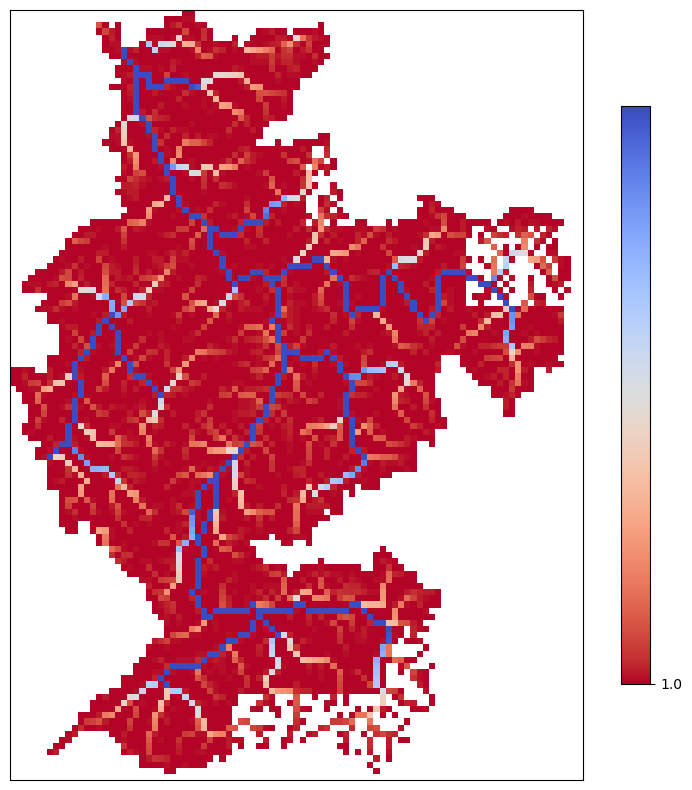

In [16]:
cleo = cube.plot(exclude_value=0, text_loc=(1,3), color_scale=1, vmin=1, vmax=100)
print(cleo)

In [17]:
HTML(cleo.anim.to_jshtml())